In [201]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
# import red wine csv
reds = pd.read_csv("winequality-red.csv", delimiter=';')
reds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# import white wine csv
whites = pd.read_csv("winequality-white.csv", delimiter=';')
whites.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# add "r" designation to reds
# this will be detached before clustering, but added now for simplicity
# entire new column "type" will be filled with "r"
reds["type"] = "r"
reds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r


In [5]:
# add "w" designation to whites
# this will be detached before clustering, but added now for simplicity
# entire new column "type" will be filled with "w"
whites["type"] = "w"
whites.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w


In [6]:
# quality columns are unneeded. split them off to hold them just in case
qualsR = reds[["quality"]].copy()
qualsW = whites[["quality"]].copy()

# drop quality columns from main DFs into new DFs
reds_noqual = reds.drop(columns=["quality"])
whites_noqual = whites.drop(columns=["quality"])

# quick header checks
display(qualsR.head(3))
display(qualsW.head(3))
display(reds_noqual.head(3))
display(whites_noqual.head(3))

,quality
0,5
1,5
2,5


,quality
0,6
1,6
2,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,r


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,w


In [25]:
# combine the two dataframes into a single one
# concat along axis so more rows are added, keeping columns the same

combined_withtypes = pd.concat([reds_noqual, whites_noqual])

# reset index values
combined_withtypes.reset_index(inplace=True, drop=True)

combined_withtypes.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,r
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,r
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,r
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,r
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,r
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,r
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,r
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,r


In [30]:
# various checks of if it worked well

print((combined_withtypes["type"] == "r").sum()) # if not 1599, there's a problem
print((combined_withtypes["type"] == "w").sum()) # if not 4898, there's a problem

# easier way to do that:
display(combined_withtypes["type"].value_counts())

# confirm "r" indices are 0 *through* 1598  and "w" indices are 1599 *through* 6496 (add 1 to end indices to slice them)
display(combined_withtypes["type"].iloc[0:1599].value_counts())
display(combined_withtypes["type"].iloc[1599:6497].value_counts())

1599
4898


w    4898
r    1599
Name: type, dtype: int64

r    1599
Name: type, dtype: int64

w    4898
Name: type, dtype: int64

In [31]:
# split off type column since we don't want it in the clustering. it's just the answer key.
combined_types = combined_withtypes[["type"]].copy()

combined_notypes = combined_withtypes.drop(columns=['type'])

display(combined_types.head(3))
display(combined_notypes.head(3))

,type
0,r
1,r
2,r


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [32]:
# now lets get on with the clustering
# we'll want to try scaling, so let's try two versions for the fun of it
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

In [33]:
# use a standardscaler

combined_standscaled = StandardScaler().fit_transform(combined_notypes)

combined_standscaled

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

In [34]:
# use a min_max scaler

combined_minmaxscaled = MinMaxScaler().fit_transform(combined_notypes)

combined_minmaxscaled

array([[0.29752066, 0.41333333, 0.        , ..., 0.6124031 , 0.19101124,
        0.20289855],
       [0.33057851, 0.53333333, 0.        , ..., 0.37209302, 0.25842697,
        0.26086957],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.41860465, 0.24157303,
        0.26086957],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.20930233, 0.13483146,
        0.20289855],
       [0.14049587, 0.14      , 0.18072289, ..., 0.48062016, 0.08988764,
        0.69565217],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.41860465, 0.05617978,
        0.55072464]])

In [35]:
# control group, unscaled

combined_unscaled = combined_notypes.values

combined_unscaled

array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
       [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
       [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [36]:
# initialize KMeans models
# since we're predicting red vs white scaling, we want n_clusters=2

standscalKMeans = KMeans(n_clusters=2, random_state=5)
minmaxscalKMeans = KMeans(n_clusters=2, random_state=5)
unscalKMeans = KMeans(n_clusters=2, random_state=5)

In [37]:
# fit each KMeans model

standscalKMeans.fit(combined_standscaled)
minmaxscalKMeans.fit(combined_minmaxscaled)
unscalKMeans.fit(combined_unscaled)

KMeans(n_clusters=2, random_state=5)

In [38]:
# make predictions for each

standscalPreds = standscalKMeans.predict(combined_standscaled)
minmaxscalPreds = minmaxscalKMeans.predict(combined_minmaxscaled)
unscalPreds = unscalKMeans.predict(combined_unscaled)

In [41]:
# the predictions are the same as the labels, so can add either to the dataframe
display(standscalPreds == standscalKMeans.labels_)
display((standscalPreds == standscalKMeans.labels_).sum())

array([ True,  True,  True, ...,  True,  True,  True])

6497

In [42]:
# add the predictions to the combined_withtypes dataframe
combined_withtypes["StandScalePreds"] = standscalPreds
combined_withtypes["MinMaxScalePreds"] = minmaxscalPreds
combined_withtypes["UnscaledPreds"] = unscalPreds

combined_withtypes.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,StandScalePreds,MinMaxScalePreds,UnscaledPreds
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,r,1,1,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,r,1,1,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,r,1,1,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,r,1,1,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,r,1,1,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,r,1,1,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,r,1,1,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,r,1,1,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,r,1,1,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,r,1,1,1


In [45]:
combined_withtypes[["type", "StandScalePreds", "MinMaxScalePreds", "UnscaledPreds"]].value_counts()

type  StandScalePreds  MinMaxScalePreds  UnscaledPreds
w     0                0                 0                2459
r     1                1                 1                1430
w     0                1                 0                1093
                                         1                1018
                       0                 1                 260
r     1                0                 1                  72
                                         0                  57
w     1                0                 0                  25
                       1                 1                  24
r     1                1                 0                  16
      0                1                 1                  12
w     1                1                 0                  11
                       0                 1                   8
r     0                0                 0                   5
                       1                 0                   5


In [47]:
# value_counts() on two columns is effectively a confusion matrix

combined_withtypes[["type", "StandScalePreds"]].value_counts()

# whites predicted as class 0: 4830 out of 4898 = 98.6%
# whites predicted as class 1: 68 out of 4898 = 1.4%

# reds predicted as class 1: 1575 out of 1599 = 98.5%
# reds predicted as class 0 : 24 out of 1599 = 1.5%

type  StandScalePreds
w     0                  4830
r     1                  1575
w     1                    68
r     0                    24
dtype: int64

In [49]:
combined_withtypes[["type", "MinMaxScalePreds"]].value_counts()

# whites predicted as class 0: 2752 out of 4898 = 56.2%
# whites predicted as class 1: 2146 out of 4898 = 43.8%

# reds predicted as class 1: 1463 out of 1599 = 91.5%
# reds predicted as class 0 : 136 out of 1599 = 8.5%

type  MinMaxScalePreds
w     0                   2752
      1                   2146
r     1                   1463
      0                    136
dtype: int64

In [51]:
combined_withtypes[["type", "UnscaledPreds"]].value_counts()

# whites predicted as class 0: 3588 out of 4898 = 73.3%
# whites predicted as class 1: 1310 out of 4898 = 26.7%

# reds predicted as class 1: 1516 out of 1599 = 94.8%
# reds predicted as class 0 : 83 out of 1599 = 5.2%

type  UnscaledPreds
w     0                3588
r     1                1516
w     1                1310
r     0                  83
dtype: int64

In [52]:
# histogram plots

Text(0.5, 0.98, 'Fixed Acidity')

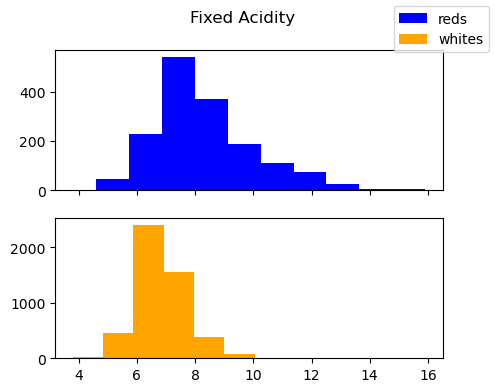

In [197]:
# reds_noqual.columns
# ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol', 'type']

#plt.hist([reds_noqual["fixed acidity"], whites_noqual["fixed acidity"]], density=True, log=False)

fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["fixed acidity"], label='reds', color='blue')
axs[1].hist(whites_noqual["fixed acidity"], label='whites', color='orange')

fig.legend()
fig.suptitle("Fixed Acidity")

Text(0.5, 0.98, 'Volatile Acidity')

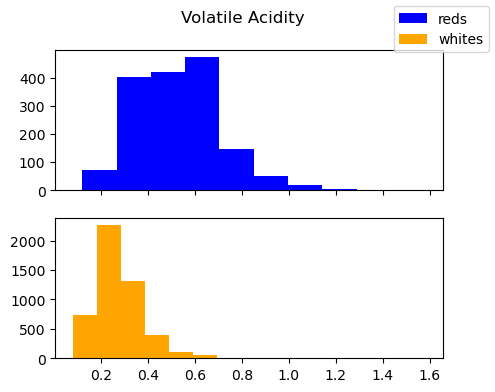

In [196]:
#plt.hist([reds_noqual["volatile acidity"], whites_noqual["volatile acidity"]], density=False, log=True)
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["volatile acidity"], label='reds', color='blue')
axs[1].hist(whites_noqual["volatile acidity"], label='whites', color='orange')

fig.legend()
fig.suptitle("Volatile Acidity")

Text(0.5, 0.98, 'Citric Acid')

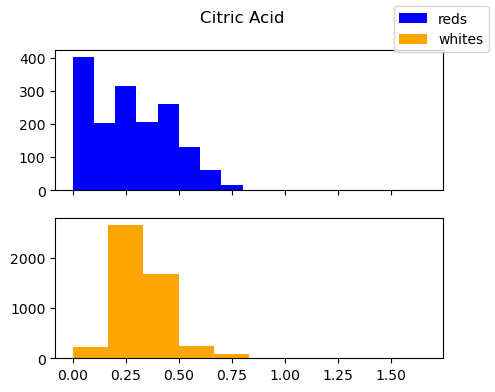

In [195]:
#plt.hist([reds_noqual["citric acid"], whites_noqual["citric acid"]], density=True, log=False)
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["citric acid"], label='reds', color='blue')
axs[1].hist(whites_noqual["citric acid"], label='whites', color='orange')

fig.legend()
fig.suptitle("Citric Acid")

Text(0.5, 0.98, 'Residual Sugar')

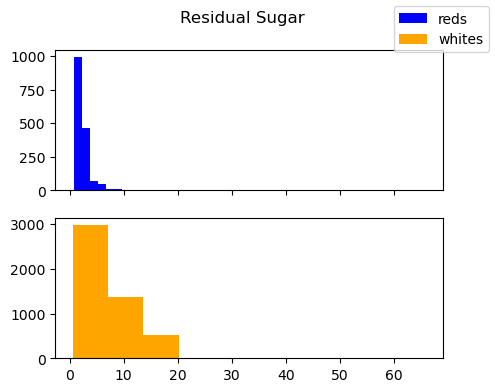

In [194]:
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["residual sugar"], label='reds', color='blue')
axs[1].hist(whites_noqual["residual sugar"], label='whites', color='orange')

fig.legend()
fig.suptitle("Residual Sugar")

Text(0.5, 0.98, 'Chlorides')

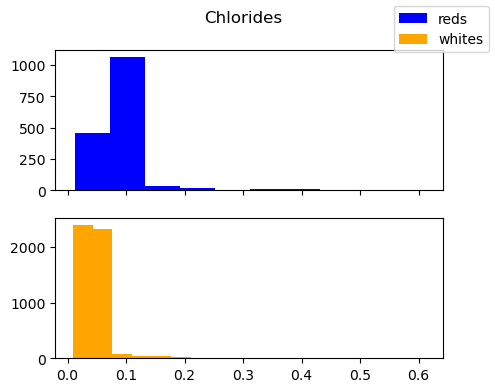

In [193]:
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["chlorides"], label='reds', color='blue')
axs[1].hist(whites_noqual["chlorides"], label='whites', color='orange')

fig.legend()
fig.suptitle("Chlorides")

Text(0.5, 0.98, 'Free Sulfur Dioxide')

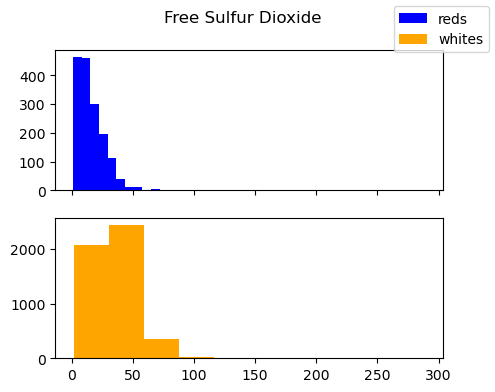

In [192]:
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["free sulfur dioxide"], label='reds', color='blue')
axs[1].hist(whites_noqual["free sulfur dioxide"], label='whites', color='orange')

fig.legend()
fig.suptitle("Free Sulfur Dioxide")

Text(0.5, 0.98, 'Total Sulfur Dioxide')

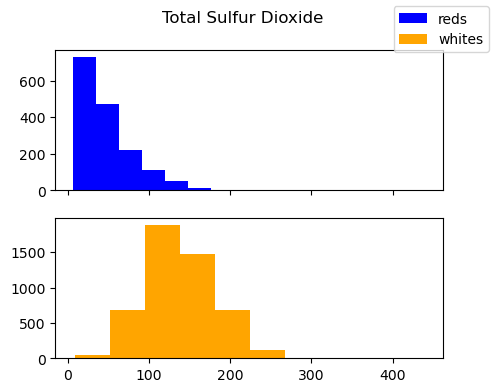

In [189]:
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["total sulfur dioxide"], label='reds', color='blue')
axs[1].hist(whites_noqual["total sulfur dioxide"], label='whites', color='orange')

fig.legend()
fig.suptitle("Total Sulfur Dioxide")

Text(0.5, 0.98, 'Density')

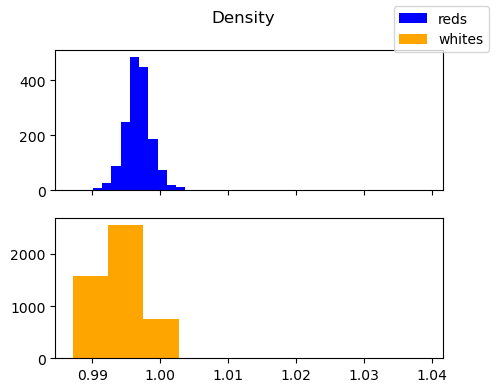

In [188]:
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["density"], label='reds', color='blue')
axs[1].hist(whites_noqual["density"], label='whites', color='orange')

fig.legend()
fig.suptitle("Density")

Text(0.5, 0.98, 'pH')

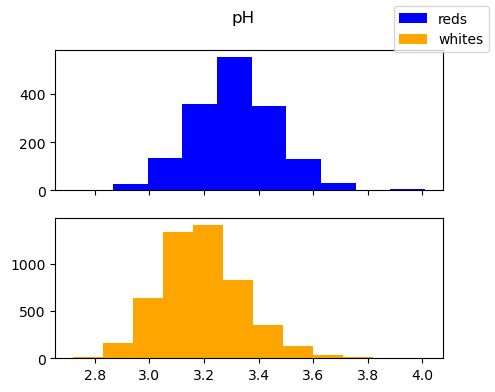

In [187]:
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["pH"], label='reds', color='blue')
axs[1].hist(whites_noqual["pH"], label='whites', color='orange')

fig.legend()
fig.suptitle("pH")

Text(0.5, 0.98, 'Sulphates')

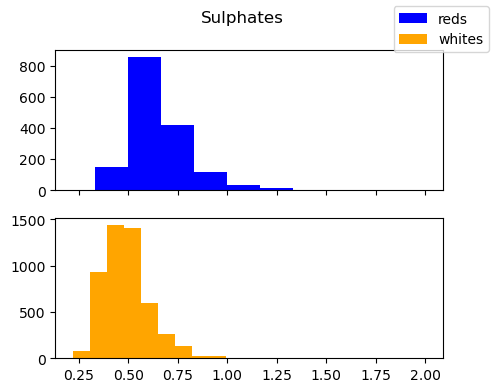

In [198]:
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["sulphates"], label='reds', color='blue')
axs[1].hist(whites_noqual["sulphates"], label='whites', color='orange')

fig.legend()
fig.suptitle("Sulphates")

Text(0.5, 0.98, 'alcohol')

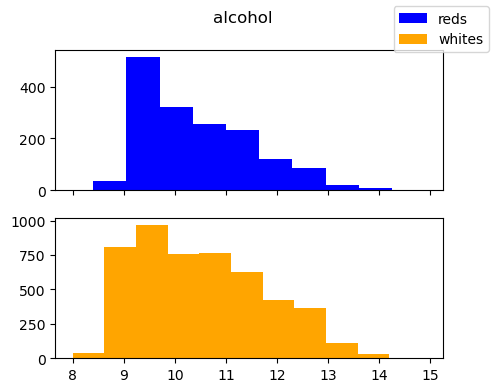

In [199]:
fig, axs = plt.subplots(2,1, sharex='col', figsize=(5,4))
axs[0].hist(reds_noqual["alcohol"], label='reds', color='blue')
axs[1].hist(whites_noqual["alcohol"], label='whites', color='orange')

fig.legend()
fig.suptitle("alcohol")

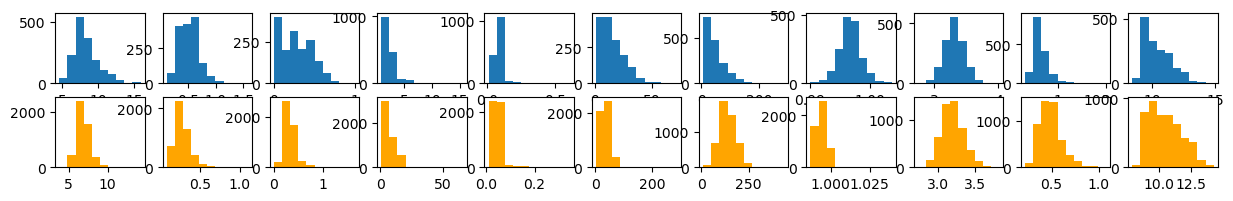

In [200]:
fig, axs = plt.subplots(2, len(reds_noqual.columns)-1, figsize=(15,2))
i = 0
for j in range(len(reds_noqual.columns)-1):
    axs[0, i].hist(reds_noqual.iloc[:,j])#, orientation='horizontal')
    axs[1, i].hist(whites_noqual.iloc[:,j], color='orange')#, orientation='horizontal')
    i+=1

# ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol', 'type']


In [233]:
# try visualizing the separation of reds and whites
# need to use plotly.express (px) to use color and symbol as column names. requires work arounds with matplotlib


# total sulfur dioxide and chlorides show separation

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

fig = px.scatter(
    combined_withtypes,
    x="total sulfur dioxide",
    y="chlorides",
    color="type",
    symbol="StandScalePreds",
    width=800,
    log_x=True,
    log_y=False,
    opacity=0.8
)
#fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [245]:
# alcohol and density show very little separation.
# example of unuseful plot

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

fig = px.scatter(
    combined_withtypes,
    x="alcohol",
    y="density",
    color="type",
    symbol="StandScalePreds",
    width=800,
    log_x=False,
    log_y=True,
    opacity=0.7
)
#fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [242]:
# total sulfur dioxide and volatile acidity also show separation

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

fig = px.scatter(
    combined_withtypes,
    x="total sulfur dioxide",
    y="volatile acidity",
    color="type",
    symbol="StandScalePreds",
    width=800,
    log_x=True,
    log_y=True,
    opacity=0.8
)
#fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [251]:
# hard to see clearly, but try 3d
# total sulfur dioxide, volatile acidity, and chlorides show separation

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

fig = px.scatter_3d(
    combined_withtypes,
    x="total sulfur dioxide",
    y="volatile acidity",
    z='chlorides',
    color="type",
    symbol="StandScalePreds",
    width=800,
    log_x=True,
    log_y=True,
    log_z=False,
    opacity=0.67
)
#fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [259]:
# hard to see clearly, but try 3d
# very little separation between alcohol/res. sugar, density, pH

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

fig = px.scatter_3d(
    combined_withtypes,
    x="alcohol", #"residual sugar",
    y="density",
    z='pH',
    color="type",
    symbol="StandScalePreds",
    width=800,
    log_x=False,
    log_y=False,
    log_z=True,
    opacity=0.67
)
#fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [266]:
# for plotting with matplotlib, need to split up dataframe

# correctly guessed reds
trueReds = combined_withtypes[((combined_withtypes['type']=='r') & (combined_withtypes["StandScalePreds"]==1))].iloc[:,0:11].copy()

# correctly guessed whites
trueWhites = combined_withtypes[((combined_withtypes['type']=='w') & (combined_withtypes["StandScalePreds"]==0))].iloc[:,0:11].copy()

# white wines guessed reds
falseReds = combined_withtypes[((combined_withtypes['type']=='w') & (combined_withtypes["StandScalePreds"]==1))].iloc[:,0:11].copy()

# red wines guessed whites
falseWhites = combined_withtypes[((combined_withtypes['type']=='r') & (combined_withtypes["StandScalePreds"]==0))].iloc[:,0:11].copy()


In [267]:
display(trueReds.info())
display(trueWhites.info())
display(falseReds.info())
display(falseWhites.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1575 non-null   float64
 1   volatile acidity      1575 non-null   float64
 2   citric acid           1575 non-null   float64
 3   residual sugar        1575 non-null   float64
 4   chlorides             1575 non-null   float64
 5   free sulfur dioxide   1575 non-null   float64
 6   total sulfur dioxide  1575 non-null   float64
 7   density               1575 non-null   float64
 8   pH                    1575 non-null   float64
 9   sulphates             1575 non-null   float64
 10  alcohol               1575 non-null   float64
dtypes: float64(11)
memory usage: 147.7 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 1599 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4830 non-null   float64
 1   volatile acidity      4830 non-null   float64
 2   citric acid           4830 non-null   float64
 3   residual sugar        4830 non-null   float64
 4   chlorides             4830 non-null   float64
 5   free sulfur dioxide   4830 non-null   float64
 6   total sulfur dioxide  4830 non-null   float64
 7   density               4830 non-null   float64
 8   pH                    4830 non-null   float64
 9   sulphates             4830 non-null   float64
 10  alcohol               4830 non-null   float64
dtypes: float64(11)
memory usage: 452.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 1714 to 6444
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         68 non-null     float64
 1   volatile acidity      68 non-null     float64
 2   citric acid           68 non-null     float64
 3   residual sugar        68 non-null     float64
 4   chlorides             68 non-null     float64
 5   free sulfur dioxide   68 non-null     float64
 6   total sulfur dioxide  68 non-null     float64
 7   density               68 non-null     float64
 8   pH                    68 non-null     float64
 9   sulphates             68 non-null     float64
 10  alcohol               68 non-null     float64
dtypes: float64(11)
memory usage: 6.4 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 49 to 1574
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         24 non-null     float64
 1   volatile acidity      24 non-null     float64
 2   citric acid           24 non-null     float64
 3   residual sugar        24 non-null     float64
 4   chlorides             24 non-null     float64
 5   free sulfur dioxide   24 non-null     float64
 6   total sulfur dioxide  24 non-null     float64
 7   density               24 non-null     float64
 8   pH                    24 non-null     float64
 9   sulphates             24 non-null     float64
 10  alcohol               24 non-null     float64
dtypes: float64(11)
memory usage: 2.2 KB


None

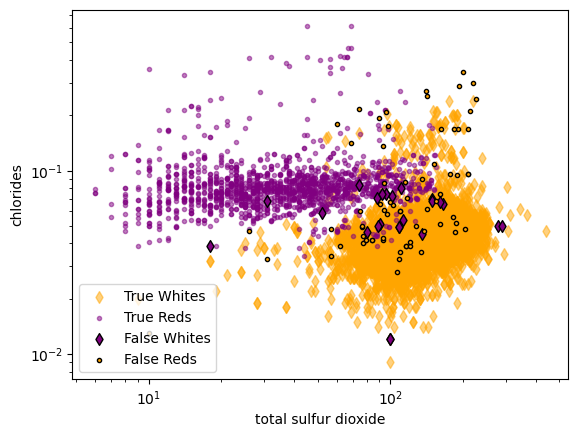

In [283]:
# reproduce # total sulfur dioxide and chlorides show separation

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

# plot whites first since there are more and reds will be on top of them

plt.scatter(trueWhites['total sulfur dioxide'], trueWhites['chlorides'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
plt.scatter(trueReds['total sulfur dioxide'], trueReds['chlorides'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
plt.scatter(falseWhites['total sulfur dioxide'], falseWhites['chlorides'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
plt.scatter(falseReds['total sulfur dioxide'], falseReds['chlorides'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("chlorides")
plt.xlabel("total sulfur dioxide")
plt.legend()

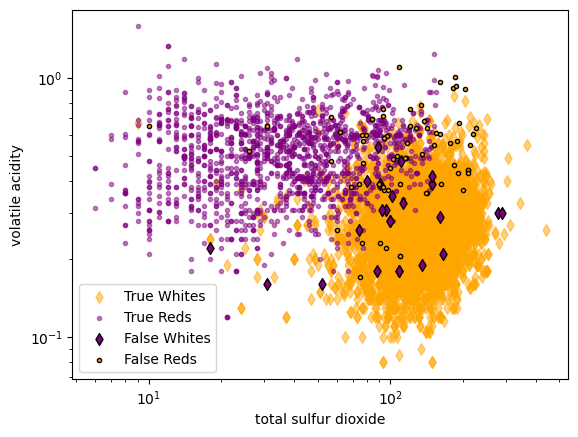

In [284]:
# reproduce # total sulfur dioxide and volatile acidity also show separation

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

plt.scatter(trueWhites['total sulfur dioxide'], trueWhites['volatile acidity'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
plt.scatter(trueReds['total sulfur dioxide'], trueReds['volatile acidity'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
plt.scatter(falseWhites['total sulfur dioxide'], falseWhites['volatile acidity'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
plt.scatter(falseReds['total sulfur dioxide'], falseReds['volatile acidity'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("volatile acidity")
plt.xlabel("total sulfur dioxide")
plt.legend()